In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min,jaccard_similarity_score
from sklearn.metrics.pairwise import cosine_similarity as cosu, euclidean_distances
from pylab import savefig

In [2]:
f=open("a.txt", "r")

In [3]:
filename=f.name
file_name=filename.split('.')

In [4]:
data=(f.read())
print(data)

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. They are adaptable at solving any kind of problem at hand (classification or

In [5]:
data=[data]

In [6]:
sentences=[]
for s in data:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [7]:
print(len(sentences))

116


In [8]:
sentences[0]

['A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.']

In [9]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['A',
  'decision',
  'tree',
  'is',
  'a',
  'decision',
  'support',
  'tool',
  'that',
  'uses',
  'a',
  'tree-like',
  'graph',
  'or',
  'model',
  'of',
  'decisions',
  'and',
  'their',
  'possible',
  'consequences',
  ',',
  'including',
  'chance',
  'event',
  'outcomes',
  ',',
  'resource',
  'costs',
  ',',
  'and',
  'utility',
  '.'],
 ['It',
  'is',
  'one',
  'way',
  'to',
  'display',
  'an',
  'algorithm',
  'that',
  'only',
  'contains',
  'conditional',
  'control',
  'statements',
  '.'],
 ['A',
  'decision',
  'tree',
  'is',
  'a',
  'flowchart-like',
  'structure',
  'in',
  'which',
  'each',
  'internal',
  'node',
  'represents',
  'a',
  '“',
  'test',
  '”',
  'on',
  'an',
  'attribute',
  '(',
  'e.g',
  '.'],
 ['whether',
  'a',
  'coin',
  'flip',
  'comes',
  'up',
  'heads',
  'or',
  'tails',
  ')',
  ',',
  'each',
  'branch',
  'represents',
  'the',
  'outcome',
  'of',
  'the',
  'test',
  ',',
  'and',
  'each',
  'leaf',
  'node',
  'r

In [10]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]



In [11]:
filtered_sentence[0]

['A',
 'decision',
 'tree',
 'decision',
 'support',
 'tool',
 'uses',
 'tree-like',
 'graph',
 'model',
 'decisions',
 'possible',
 'consequences',
 ',',
 'including',
 'chance',
 'event',
 'outcomes',
 ',',
 'resource',
 'costs',
 ',',
 'utility',
 '.']

In [12]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [13]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [14]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['a',
  'decis',
  'tree',
  'decis',
  'support',
  'tool',
  'use',
  'tree lik',
  'graph',
  'model',
  'decis',
  'possibl',
  'consequ',
  'includ',
  'chanc',
  'event',
  'outcom',
  'resourc',
  'cost',
  'util'],
 ['it',
  'one',
  'way',
  'display',
  'algorithm',
  'contain',
  'condit',
  'control',
  'statement'],
 ['a',
  'decis',
  'tree',
  'flowchart lik',
  'structur',
  'intern',
  'node',
  'repres',
  'test',
  'attribut',
  'e g'],
 ['whether',
  'coin',
  'flip',
  'come',
  'head',
  'tail',
  'branch',
  'repres',
  'outcom',
  'test',
  'leaf',
  'node',
  'repres',
  'class',
  'label',
  'decis',
  'taken',
  'comput',
  'attribut'],
 ['the', 'path', 'root', 'leaf', 'repres', 'classif', 'rule'],
 ['tree',
  'base',
  'learn',
  'algorithm',
  'consid',
  'one',
  'best',
  'mostli',
  'use',
  'supervis',
  'learn',
  'method'],
 ['tree',
  'base',
  'method',
  'empow',
  'predict',
  'model',
  'high',
  'accuraci',
  'stabil',
  'eas',
  'interpret'],


In [15]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [16]:
len(Distinct_Words)

460

In [17]:

len(words)

1239

# Data Visulaizaton

In [18]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])
    

0 pre defin
1 i e
2 over complex
3 compar
4 repeat
5 oper
6 detail
7 next
8 leaf 
9 paramet
10 differ
11 data
12 default
13 prune
14 decision tre
15 brand
16 ft
17 handl
18 stop
19 also
20 tail
21 relationship
22 ix 
23 process
24 less
25 continu
26 x
27 per
28 mine
29 label
30 pain
31 languag
32 depend
33 sub nod
34 prefer
35 branch
36 coin
37 root
38 use
39 outcom
40 histor
41 deliber
42 adapt
43 each
44 boy 
45 occup
46 mostli
47 as
48 highli
49 sampl
50 some
51 effort
52 target
53 explor
54 guarante
55 busi
56 support
57 flowchart lik
58 analysi
59 need
60 abl
61 repres
62 while
63 see
64 intuit
65 structur
66 base
67 gender
68 overfit
69 consequ
70 resourc
71 class
72 likelihood
73 program
74 whether
75 treatment
76 scenario
77 advantag
78 poor
79 better
80 independ
81 make
82 enabl
83 term
84 avail
85 come
86 even
87 success
88 varianc
89 non overlap
90 categor
91 on
92 bias
93 distinct
94 problem
95 graph
96 common
97 e g 
98 speci
99 prepar
100 want
101 null
102 numer
103 strat

## Count representation


In [19]:
word_Count_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_Count_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_Count_matrix[i][x] = word_Count_matrix[i][x] +1
                continue
                
word_Count_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## BM-25

In [20]:
BM_25_weight=np.empty(shape=(len(line),len(Distinct_Words)))
BM_25_weight.fill(0)
    
    
avg_length=np.mean(word_Count_matrix.sum(axis=1))
    
length_size=np.array(1.5*word_Count_matrix.sum(axis=1)/avg_length)
    
isf=np.array(np.log(len(line)/np.count_nonzero(word_Count_matrix,axis=0)))

denominator=np.empty(shape=(len(line),len(Distinct_Words)))
for i in range(len(line)):
    denominator[i,:]=(word_Count_matrix[i,:]+length_size[i]+0.5)
    
BM_25_weight=(word_Count_matrix*isf)/(denominator)
BM_25_weight

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Tf-idf

In [21]:
tfidf_weight=np.empty(shape=(len(line),len(Distinct_Words)))
tfidf_weight.fill(0)

tfidf_weight = word_Count_matrix*isf
tfidf_weight

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Binary

In [22]:
word_binary_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_binary_matrix.fill(0)

for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_binary_matrix[i][x] = 1
                continue
word_binary_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Similarities

## 1 Euclidean with BM25

In [23]:
euclidean_bm25 =euclidean_distances(BM_25_weight)
euclidean_bm25 = (1-(euclidean_bm25/np.max(euclidean_bm25)))
print(euclidean_bm25)

[[1.         0.09698036 0.22188399 ... 0.14395208 0.19859701 0.16649267]
 [0.09698036 1.         0.15848007 ... 0.11287815 0.16630175 0.16424629]
 [0.22188399 0.15848007 1.         ... 0.20945314 0.26859172 0.22354598]
 ...
 [0.14395208 0.11287815 0.20945314 ... 1.         0.21655412 0.17434256]
 [0.19859701 0.16630175 0.26859172 ... 0.21655412 1.         0.31453428]
 [0.16649267 0.16424629 0.22354598 ... 0.17434256 0.31453428 1.        ]]


## 2 Cosine with BM25

In [24]:
cosine_bm25=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(BM_25_weight[i], BM_25_weight[j])
        norm_i = np.linalg.norm(BM_25_weight[i])
        norm_j = np.linalg.norm(BM_25_weight[j])
        cosine_bm25[i, j] = dot_product/(norm_i*norm_j)
cosine_bm25

array([[1.        , 0.        , 0.07716111, ..., 0.00185534, 0.        ,
        0.02179388],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.08534227],
       [0.07716111, 0.        , 1.        , ..., 0.00309712, 0.        ,
        0.        ],
       ...,
       [0.00185534, 0.        , 0.00309712, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.20468351],
       [0.02179388, 0.08534227, 0.        , ..., 0.        , 0.20468351,
        1.        ]])

## 3 Euclidean with tfidf

In [25]:
euclidean_tfidf =euclidean_distances(tfidf_weight)
euclidean_tfidf = (1-(euclidean_tfidf/np.max(euclidean_tfidf)))
print(euclidean_tfidf)

[[1.         0.50875844 0.54453759 ... 0.49966453 0.56724457 0.54941814]
 [0.50875844 1.         0.63325454 ... 0.59779666 0.68650326 0.67134303]
 [0.54453759 0.63325454 1.         ... 0.62116027 0.71634312 0.68411107]
 ...
 [0.49966453 0.59779666 0.62116027 ... 1.         0.67178282 0.6435577 ]
 [0.56724457 0.68650326 0.71634312 ... 0.67178282 1.         0.77379396]
 [0.54941814 0.67134303 0.68411107 ... 0.6435577  0.77379396 1.        ]]


## 4 Cosine with tfidf

In [26]:
cosine_tfidf=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(tfidf_weight[i], tfidf_weight[j])
        norm_i = np.linalg.norm(tfidf_weight[i])
        norm_j = np.linalg.norm(tfidf_weight[j])
        cosine_tfidf[i, j] = dot_product/(norm_i*norm_j)
cosine_tfidf

array([[1.        , 0.        , 0.08177021, ..., 0.00180392, 0.        ,
        0.02162267],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.08534227],
       [0.08177021, 0.        , 1.        , ..., 0.00303513, 0.        ,
        0.        ],
       ...,
       [0.00180392, 0.        , 0.00303513, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.20468351],
       [0.02162267, 0.08534227, 0.        , ..., 0.        , 0.20468351,
        1.        ]])

## 5 Euclidean with count

In [27]:
euclidean_count =euclidean_distances(word_Count_matrix)
euclidean_count = (1-(euclidean_count/np.max(euclidean_count)))
print(euclidean_count)

[[1.         0.52480904 0.58263499 ... 0.50486235 0.56745315 0.56005865]
 [0.52480904 1.         0.6407894  ... 0.61478954 0.72175666 0.71039515]
 [0.58263499 0.6407894  1.         ... 0.61478954 0.69946285 0.66882419]
 ...
 [0.50486235 0.61478954 0.61478954 ... 1.         0.66882419 0.6407894 ]
 [0.56745315 0.72175666 0.69946285 ... 0.66882419 1.         0.78748814]
 [0.56005865 0.71039515 0.66882419 ... 0.6407894  0.78748814 1.        ]]


## 6 Cosine with count

In [28]:
cosine_count=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_Count_matrix[i], word_Count_matrix[j])
        norm_i = np.linalg.norm(word_Count_matrix[i])
        norm_j = np.linalg.norm(word_Count_matrix[j])
        cosine_count[i, j] = dot_product/(norm_i*norm_j)
cosine_count

array([[1.        , 0.        , 0.2956562 , ..., 0.05241424, 0.        ,
        0.08006408],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.13608276],
       [0.2956562 , 0.        , 1.        , ..., 0.0805823 , 0.        ,
        0.        ],
       ...,
       [0.05241424, 0.        , 0.0805823 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.23570226],
       [0.08006408, 0.13608276, 0.        , ..., 0.        , 0.23570226,
        1.        ]])

## 7 Euclidean with binary

In [29]:
euclidean_binary =euclidean_distances(word_binary_matrix)
euclidean_binary = (1-(euclidean_binary/np.max(euclidean_binary)))
print(euclidean_binary)

[[1.         0.39595955 0.44249591 ... 0.39595955 0.4672864  0.45475024]
 [0.39595955 1.         0.48012476 ... 0.48012476 0.59730637 0.58086318]
 [0.44249591 0.48012476 1.         ... 0.48012476 0.56504116 0.52069871]
 ...
 [0.39595955 0.48012476 0.48012476 ... 1.         0.56504116 0.52069871]
 [0.4672864  0.59730637 0.56504116 ... 0.56504116 1.         0.69243766]
 [0.45475024 0.58086318 0.52069871 ... 0.52069871 0.69243766 1.        ]]


## 8 Cosine with binary

In [30]:
cosine_binary=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_binary_matrix[i], word_binary_matrix[j])
        norm_i = np.linalg.norm(word_binary_matrix[i])
        norm_j = np.linalg.norm(word_binary_matrix[j])
        cosine_binary[i, j] = dot_product/(norm_i*norm_j)
cosine_binary

array([[1.        , 0.        , 0.21320072, ..., 0.07106691, 0.        ,
        0.09622504],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.13608276],
       [0.21320072, 0.        , 1.        , ..., 0.09090909, 0.        ,
        0.        ],
       ...,
       [0.07106691, 0.        , 0.09090909, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.23570226],
       [0.09622504, 0.13608276, 0.        , ..., 0.        , 0.23570226,
        1.        ]])

## 9 Jaccard with binary

In [31]:
def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = intrsct / unions
    return dist

In [32]:
jaccard_binary = pairwise_jaccard(word_binary_matrix)
print(jaccard_binary)

[[1.         0.         0.11538462 ... 0.03571429 0.         0.04347826]
 [0.         1.         0.         ... 0.         0.         0.07142857]
 [0.11538462 0.         1.         ... 0.04761905 0.         0.        ]
 ...
 [0.03571429 0.         0.04761905 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.125     ]
 [0.04347826 0.07142857 0.         ... 0.         0.125      1.        ]]


# Attepmt for 20 kmeans clusters and agglomerative clustering

In [ ]:
summary=""

no_of_iteration=10000
n_clusters = int(np.ceil(len(line)**0.5))
sentences_cluster_check=np.empty(shape=(len(line),len(line)))
sse=[]
iter_run=[]

for i in range(no_of_iteration):
    kmeans= (KMeans(init="k-means++",n_clusters=n_clusters, random_state=i))
    kmeans = kmeans.fit(cosine_bm25)
#   storing everyweight in matrix

    sse.append(kmeans.inertia_)
    iter_run.append(kmeans.n_iter_)
    for i in range(len(kmeans.labels_)):
        for j in range(len(kmeans.labels_)):
            if kmeans.labels_[i] == kmeans.labels_[j] and i!=j:
                sentences_cluster_check[i][j]+=1



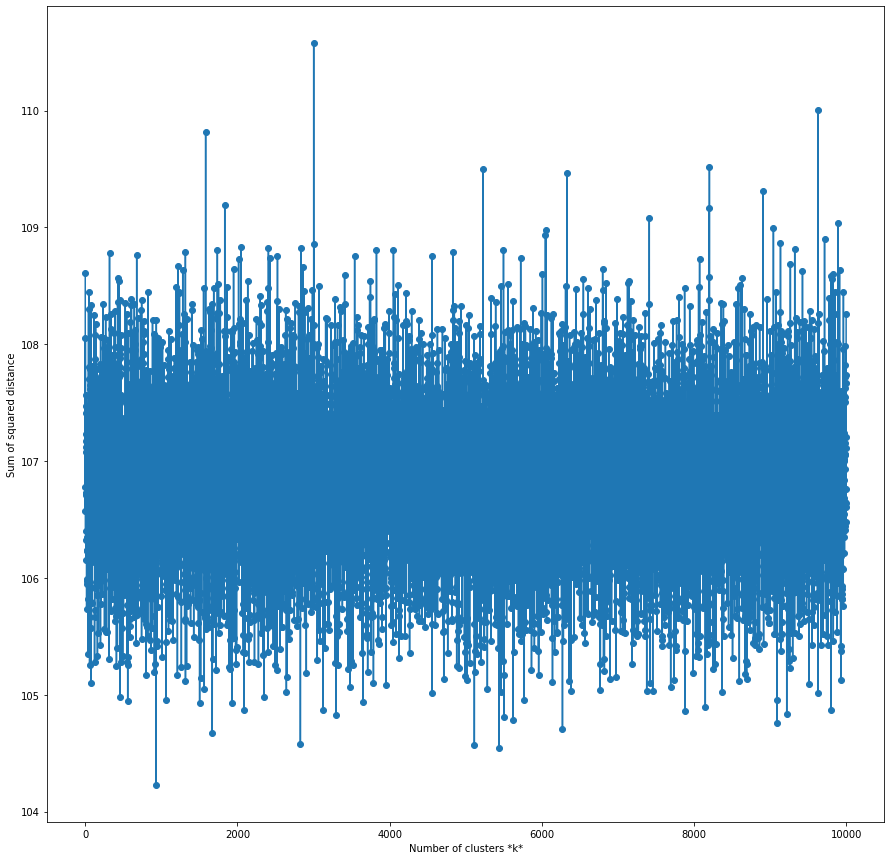

In [98]:
list_k = list(range(no_of_iteration))
plt.figure(figsize=(20, 15))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

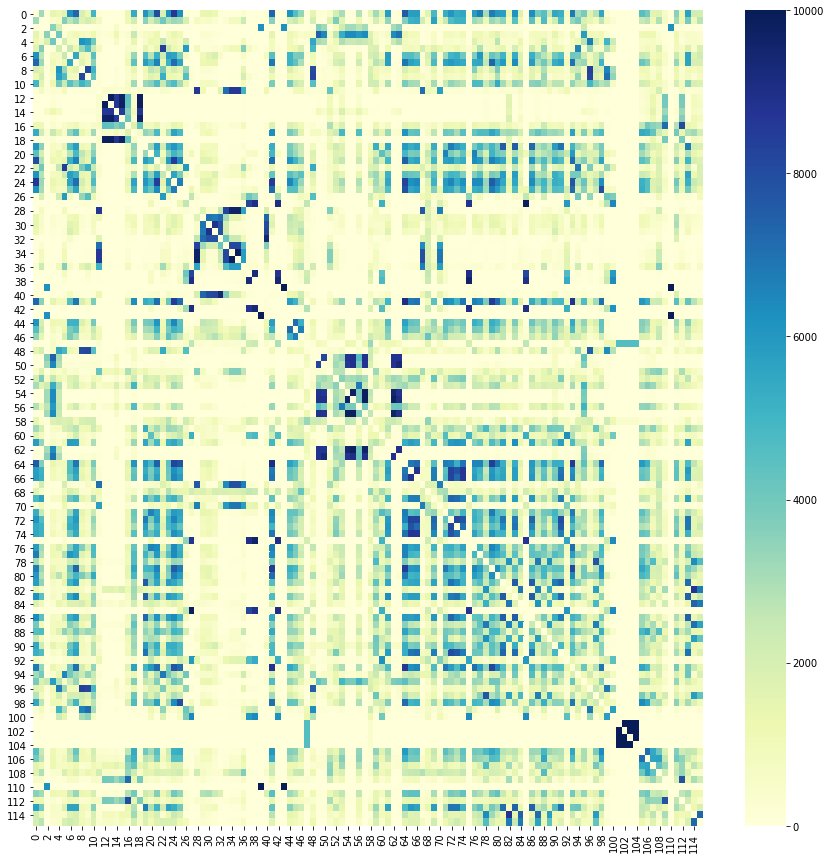

In [99]:
f,ax = plt.subplots(figsize=(15, 15))
fig=sns.heatmap(sentences_cluster_check, cmap="YlGnBu")

figure = fig.get_figure()    
figure.savefig('sse.png', dpi=50)

In [97]:
(sse.index(min(sse)))

931

## summary function

In [33]:
def summary_func(similarity_matrix):
    summary=""
    n_clusters = int(np.ceil(len(similarity_matrix)**0.5))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans = kmeans.fit(similarity_matrix)
    avg = []
    closest = []
    for j in range(n_clusters):
        idx = np.where(kmeans.labels_ == j)[0]
        avg.append(np.mean(idx))
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_,similarity_matrix)
    ordering = sorted(range(n_clusters), key=lambda k: avg[k])
    summary = ' '.join([sentences[closest[idx]][0] for idx in ordering])
    return summary

## euclidean BM25 summary

In [34]:
euclidean_BM25_summary=summary_func(euclidean_bm25)
print(euclidean_BM25_summary)

15 out of these 30 play cricket in leisure time. Advantages of Decision Tree:
Easy to Understand: Decision tree output is very easy to understand even for people from non-analytical background. To identify the variable and the split, decision tree uses various algorithms. Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree. :- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (yes/ no). Decision Tree algorithms are referred to as CART (Classification and Regression Trees). It can be of two types:
Categorical Variable Decision Tree: Decision Tree which has categorical target variable then it called as categorical variable decision tree. Less data cleaning required: It requires less data cleaning compared to some other modeling techniques. Over fitting is one of the most practical difficulty for decision tree models. This means that decision trees have no assumptions about the spa

## cosine BM25 summary

In [35]:
cosine_BM25_summary=summary_func(cosine_bm25)
print(cosine_BM25_summary)

In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three. Splitting: It is a process of dividing a node into two or more sub-nodes. E.g. We compare the values of the root attribute with record’s attribute. Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. For e.g., we are working on a problem where we have information available in hundreds of variables, there decision tree will help to identify most significant variable. If the values are continuous then they are discretized prior to building the model. This means that decision trees are typically drawn upside down such that leaves are the bottom & roots are the tops. It i

## euclidean tfidf summary

In [36]:
euclidean_tfidf_summary=summary_func(euclidean_tfidf)
print(euclidean_tfidf_summary)

“The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.”
- Niklaus Wirth (1934 — ), Programming language designer
Methods like decision trees, random forest, gradient boosting are being popularly used in all kinds of data science problems. Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node. Example applications include:
· Evaluation of brand expansion opportunities for a business using historical sales data
· Determination of likely buyers of a product using demographic data to enable targeting of limited advertisement budget
· Prediction of likelihood of default for applicant borrowers using predictive models generated from historical data
· Help with prioritization of emergency room patient treatment using a predictive model based on factors such as age, blood pressure, gender, location and severity of pain, and 

## cosine tfidf summary

In [37]:
cosine_tfidf_summary=summary_func(cosine_tfidf)
print(cosine_tfidf_summary)

Decision Node: When a sub-node splits into further sub-nodes, then it is called decision node. Decision tree identifies the most significant variable and its value that gives best homogeneous sets of population. “The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.”
- Niklaus Wirth (1934 — ), Programming language designer
Methods like decision trees, random forest, gradient boosting are being popularly used in all kinds of data science problems. Types of Decision Trees
Types of decision tree is based on the type of target variable we have. E.g. Not fit for continuous variables: While working with continuous numerical variables, decision tree loses information, when it categorizes variables in different categories. We compare the values of the root attribute with record’s attribute. The primary differences and similarities between Classification and Regression Trees are:
Regression trees are used when depe

## euclidean count summary

In [38]:
euclidean_count_summary=summary_func(euclidean_count)
print(euclidean_count_summary)

Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node. Example applications include:
· Evaluation of brand expansion opportunities for a business using historical sales data
· Determination of likely buyers of a product using demographic data to enable targeting of limited advertisement budget
· Prediction of likelihood of default for applicant borrowers using predictive models generated from historical data
· Help with prioritization of emergency room patient treatment using a predictive model based on factors such as age, blood pressure, gender, location and severity of pain, and other measurements
· Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. It can be of two types:
Categorical Varia

## cosine count summary

In [39]:
cosine_count_summary=summary_func(cosine_count)
print(cosine_count_summary)

Parent and Child Node: A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node. In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three. A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Records are distributed recursively on the basis of attribute values. With the help of decision trees, we can create new variables / features that has better power to predict target variable. Decision tree learners create biased trees if some classes dominate. YES or NO. E.g. Both the trees follow a top-down greedy approach known as recursive binary splitting. It can also be used in data exploration stage. In case of Regression Tree, the value obtained by terminal nodes in the training data is the mean response of 

## euclidean binary summary

In [40]:
euclidean_binary_summary=summary_func(euclidean_binary)
print(euclidean_binary_summary)

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. “The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.”
- Niklaus Wirth (1934 — ), Programming language designer
Methods like decision trees, random forest, gradient boosting are being popularly used in all kinds of data science problems. Example applications include:
· Evaluation of brand expansion opportunities for a business using historical sales data
· Determination of likely buyers of a product using demographic data to enable targeting of limited advertisement budget
· Prediction of likelihood of default for applicant borrowers using predictive models generated from historical data
· Help with prioritization of emergency room patient treatment using a predictive model based on factors such as age, blood pressure, g

## cosine binary summary

In [41]:
cosine_binary_summary=summary_func(cosine_binary)
print(cosine_binary_summary)


Leaf/ Terminal Node: Nodes do not split is called Leaf or Terminal node. :- In above scenario of student problem, where the target variable was “Student will play cricket or not” i.e. Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. Its graphical representation is very intuitive and users can easily relate their hypothesis. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. Decision trees implicitly perform variable screening or feature selection. Decision tree learners create biased trees if some classes dominate. E.g. Records are distributed recursively on the basis of attribute values. Both the trees follow a top-down greedy approach known as recursive binary splitting. This bring ‘pruning’.


## jaccard binary summary

In [42]:
jaccard_binary_summary=summary_func(jaccard_binary)
print(jaccard_binary_summary)


Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. 15 out of these 30 play cricket in leisure time. Splitting: It is a process of dividing a node into two or more sub-nodes. Decision Tree algorithms are referred to as CART (Classification and Regression Trees). Records are distributed recursively on the basis of attribute values. Data type is not a constraint: It can handle both numerical and categorical variables. Types of Decision Trees
Types of decision tree is based on the type of target variable we have. This problem gets solved by setting constraints on model parameters and pruning. E.g. Applications for Decision Tree - Decision trees have a natural “if … then … else …” construction that makes it fit easily into a programmatic structure. Thus, if an unseen data observation falls in that region, we’ll make its prediction with mean value.


In [43]:
p=open(file_name[0]+"_summary."+file_name[1],"a")

In [44]:
p.write("euclidean BM25 summary\n\n"+euclidean_BM25_summary+"\n\n\n\n\n\n\n\n cosine BM25 summary \n\n"+cosine_BM25_summary+"\n\n\n\n\n\n\n\n euclidean tfidf summary \n\n"+euclidean_tfidf_summary+"\n\n\n\n\n\n\n\n cosine tfidf summary \n\n"+cosine_tfidf_summary+"\n\n\n\n\n\n\n\n euclidean count summary \n\n"+euclidean_count_summary +"\n\n\n\n\n\n\n\n cosine count summary \n\n"+cosine_count_summary+"\n\n\n\n\n\n\n\n euclidean binary summary \n\n"+euclidean_binary_summary +"\n\n\n\n\n\n\n\n cosine binary summary \n\n"+cosine_binary_summary+"\n\n\n\n\n\n\n\n jaccard binary summary \n\n"+jaccard_binary_summary+"\n\n\n\n\n\n\n\n"+data[0])
p.close()